# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: Yao Gahounzo

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200    # This is the number of steps (or time steps) in our Random Walk
Nx = 1000   # Initialize the number of walkers.

mu_x = 1.5     # The average step size in our random walk
s_x = 2.1      # The standard deviation of the step size in our random walk
min_x = 1.25   #the _minimum step size_ at each step in our random walk

# Create a new container for all walkers at each time step. This will correspond to an 
# array of zeros that has Nt rows and Nx columns. So each row corresponds to a specific
# time step and each column corresponds to a specific walker. 
X = np.zeros((Nt,Nx))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x*np.random.randn() + mu_x
        
        # Verify if the random step size for the j^th walker at the i^th time step is greater than min_x if not create a new one
        while(x_i < min_x):
            
            x_i = s_x*np.random.randn() + mu_x
    
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 
            

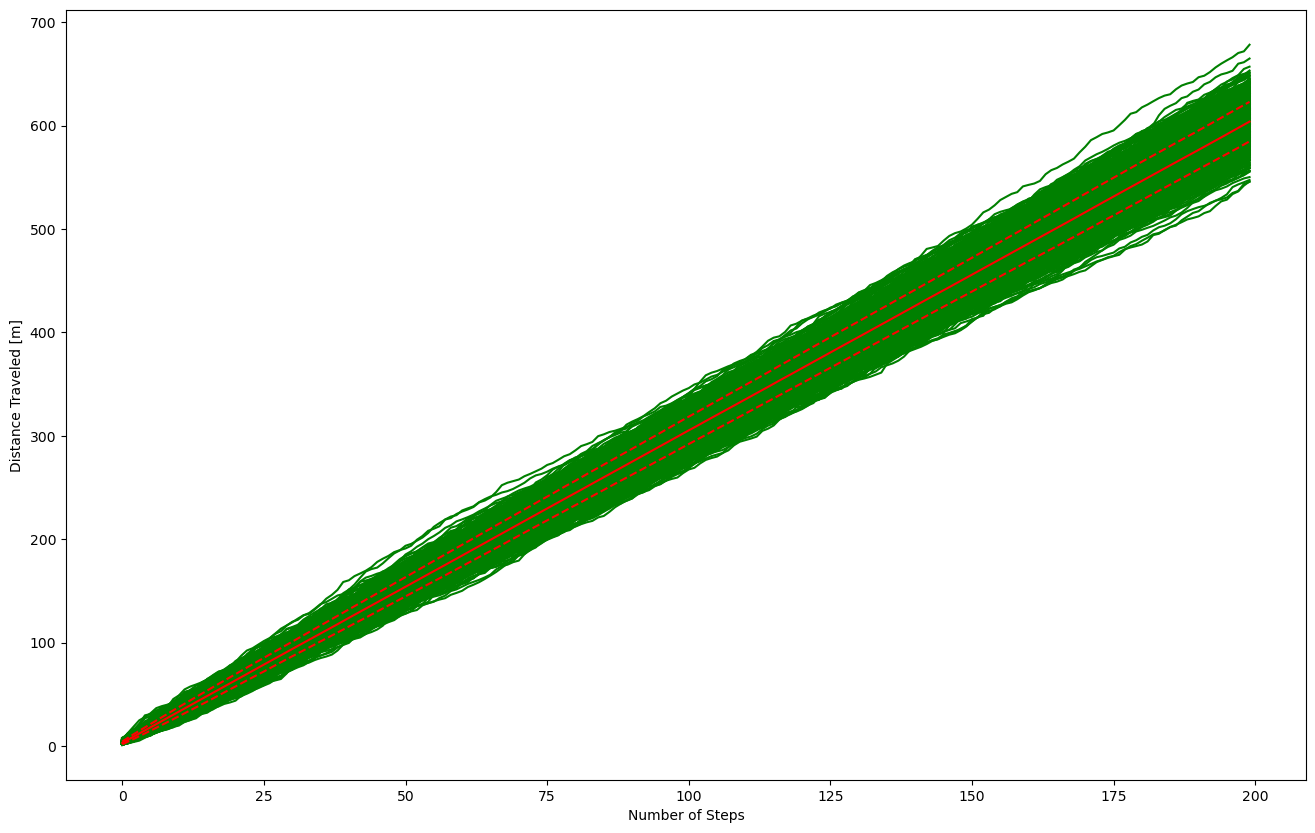

In [2]:
mean_X = np.mean(X,axis=1)   # Calculate the average distance of all walkers through time
std_X = np.std(X,axis=1)     # Calculate the standard deviation of all walkers through time

plt.figure(figsize=(16,10))  # Create a figure and make it 16" wide x 10" tall

plt.plot(np.arange(Nt),X,'g-')               # Plot x vs i (created using np.arange(Nt)) as a blue line
plt.plot(np.arange(Nt),mean_X,'r-')
plt.plot(np.arange(Nt),mean_X + std_X, 'r--')
plt.plot(np.arange(Nt),mean_X - std_X, 'r--')
plt.xlabel('Number of Steps') 
plt.ylabel('Distance Traveled [m]')
plt.show()

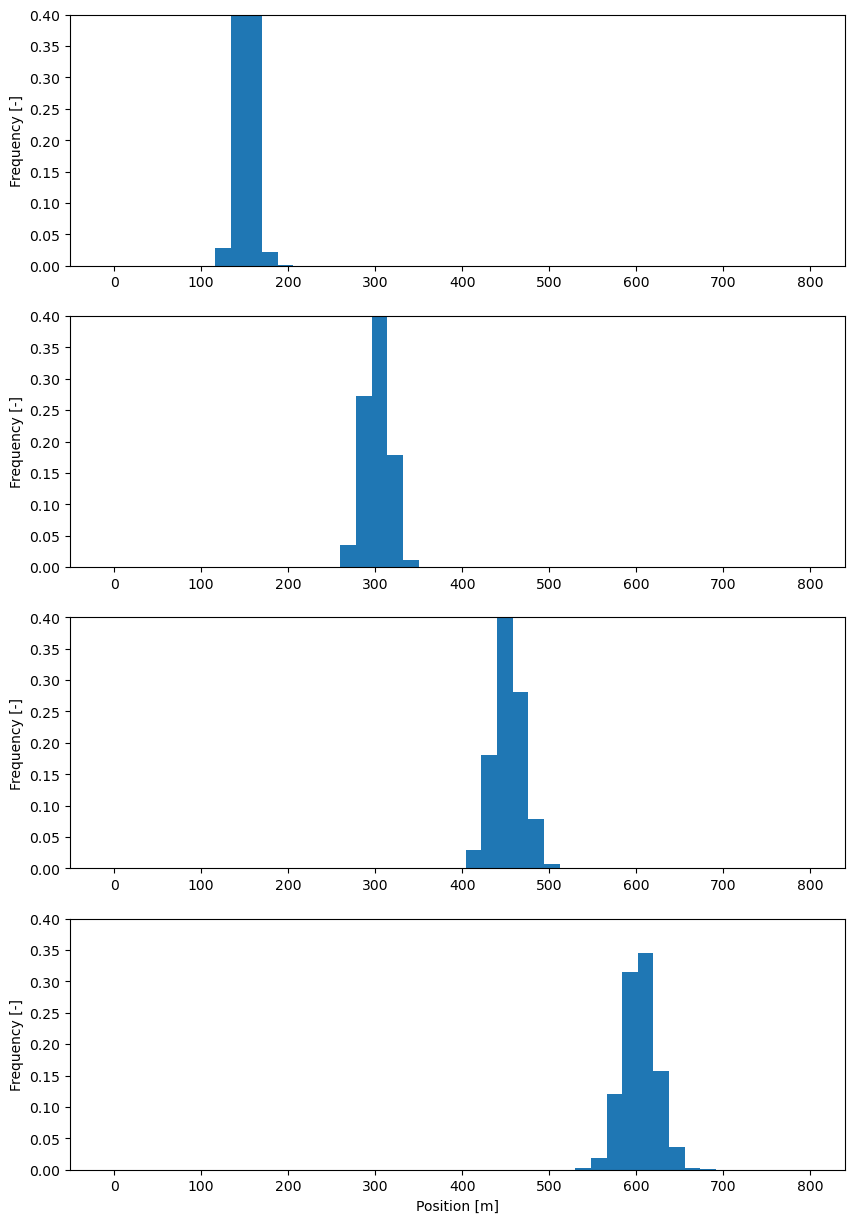

In [3]:
x_50, be_50 = np.histogram(X[49,:], bins=45, range=(-10.0,800))
x_100, be_100 = np.histogram(X[99,:], bins=45, range=(-10.0,800))
x_150, be_150 = np.histogram(X[149,:], bins=45, range=(-10.0,800))
x_200, be_200 = np.histogram(X[-1,:], bins=45, range=(-10.0,800))

plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.4))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')
plt.show()

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

In [4]:
Nt = 300
Nx = 3

mu_x = 0.5
s_x = 1.5
mu_y = 5.0
s_y = 2.5

# Create a new container for all walkers at each time step in X and Y directions. This will correspond to an 
# array of zeros that has Nt rows and Nx columns. So each row corresponds to a specific
# time step and each column corresponds to a specific walker. 
X = np.zeros((Nt,Nx))
Y = np.zeros((Nt,Nx))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step in both directions
        x_i = s_x*np.random.randn() + mu_x
        y_i = s_y*np.random.randn() + mu_y
    
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i 
            Y[i,j] = 0.0 + y_i
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 
            Y[i,j] = Y[i-1,j] + y_i 
            

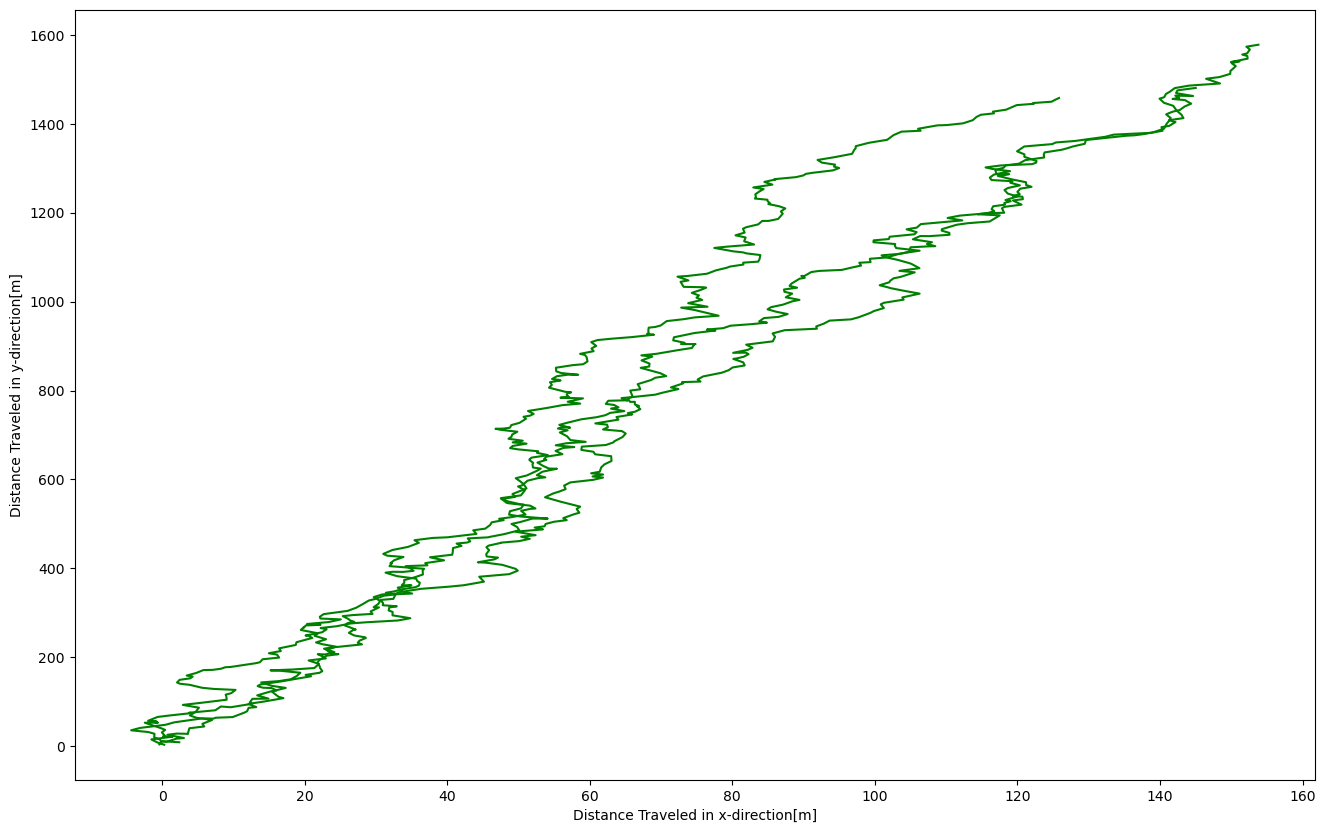

In [5]:
plt.figure(figsize=(16,10))                       # Create a new figure and make it 16" wide by 10" tall

plt.plot(X,Y,'g-')                                # Plot the location of all walkers in x-direction versus all walkers y-direction
plt.xlabel('Distance Traveled in x-direction[m]') # Label the x-axis
plt.ylabel('Distance Traveled in y-direction[m]') # Label the y-axis
plt.show()